In [1]:
import os
import sys
sys.path.append("/home/sardarchitect/repos/github.com/ucsd_capstone/")

In [2]:
from streetstudy.data import virat

In [13]:
CURRENT_VIDEO_PATH = '/home/sardarchitect/repos/github.com/ucsd_capstone/virat/videos/VIRAT_S_000006.mp4'
annotations_df = virat.get_annotations_df(CURRENT_VIDEO_PATH, format='yolo', normalize=False, object_id=True)

In [14]:
annotations_df.head()

,current_frame,object_type,object_id,bbox_center_x,bbox_center_y,bbox_width,bbox_height
20406,186,0,8,54.0,752.0,56,132
20407,187,0,8,56.5,752.0,57,132
20408,188,0,8,59.0,751.0,58,132
20409,189,0,8,62.0,750.0,58,132
20410,190,0,8,65.5,750.0,59,132


In [15]:
import cv2 as cv

In [16]:
def generate_frames(video_path):
    capture = cv.VideoCapture(CURRENT_VIDEO_PATH)
    capture_width = capture.get(cv.CAP_PROP_FRAME_WIDTH)
    capture_height = capture.get(cv.CAP_PROP_FRAME_HEIGHT)
    
    while capture.isOpened():
        success, current_frame = capture.read()
        if not success:
            break
        
        yield current_frame
    capture.release()

In [17]:
frame_iterator = iter(generate_frames(CURRENT_VIDEO_PATH))
for i in range(5):
    current_frame = next(frame_iterator)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

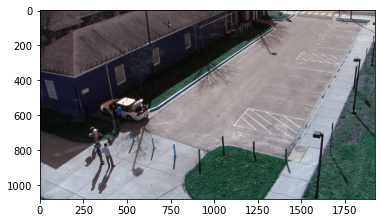

In [19]:
plt.imshow(current_frame)

## Pedestrian Density

In [20]:
import seaborn as sns

In [21]:
feet_x = annotations_df['bbox_center_x']
feet_y = annotations_df['bbox_center_y'] + (annotations_df['bbox_height'] / 2)

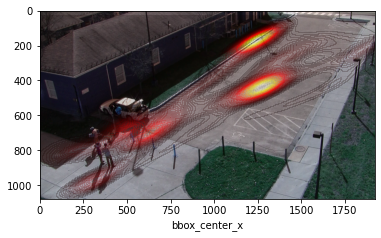

In [22]:
def pedestrian_density(frame, feet_x, feet_y):
    fig, ax = plt.subplots()
    sns.kdeplot(x=feet_x, y=feet_y, thresh=0, levels=50, alpha=0.2, fill=True, ax=ax, cmap='hot')
    fig.gca().invert_yaxis()
    ax.imshow(frame)
    
    
pedestrian_density(current_frame, feet_x, feet_y)

## Person Specific Path

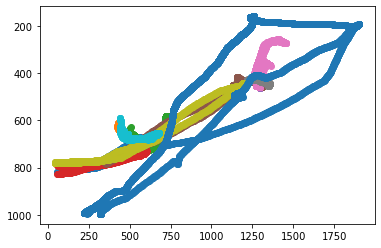

In [58]:
def person_path(object_id, annotations_df):
    obj_df = annotations_df[annotations_df['object_id'] == obj]
    feet_x = obj_df['bbox_center_x']
    feet_y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)
    
#     fig, ax = plt.subplots()
    plt.scatter(feet_x, feet_y)
    plt.gca().invert_yaxis()
                            
object_id_list = annotations_df['object_id'].unique()
for obj in object_id_list:
    person_path(obj, annotations_df)

## Directional Analysis

In [60]:
import numpy as np

In [209]:
obj_df = annotations_df[annotations_df['object_id'] == object_id_list[5]]
x = obj_df['bbox_center_x']
y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)

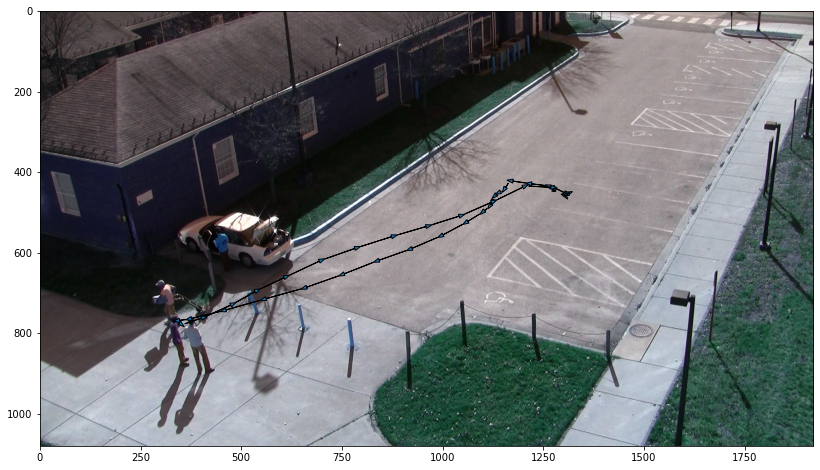

In [210]:
fig = plt.figure(figsize=(16,8))
step = 25
i = 0
while True:
    if i+step >= len(x):
        break
    X = x.iloc[i]
    Y = y.iloc[i]
    X_next = x.iloc[i + step]
    Y_next = y.iloc[i + step]
    dX = X_next - X
    dY = Y_next - Y
    
    plt.arrow(X, Y, dX, dY, length_includes_head=True, head_starts_at_zero=True, head_width=10)
    plt.gca().invert_yaxis()
    i = i + step
plt.imshow(current_frame)


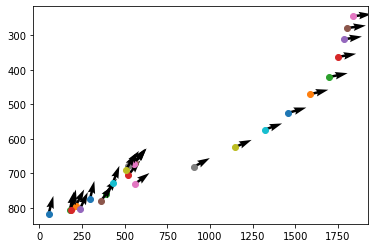

In [153]:
step = 50
i = 0
while True:
    if i+step >= len(x):
        break
    X = x.iloc[i]
    Y = y.iloc[i]
    U = x.iloc[i + step]
    V = y.iloc[i + step]
    
    plt.quiver(X, Y, U, V, angles='uv', pivot='tail', units='width')
    plt.scatter(X, Y)
    plt.gca().invert_yaxis()
    i += step

In [84]:
def person_path(object_id, annotations_df):
    obj_df = annotations_df[annotations_df['object_id'] == obj]
    x = obj_df['bbox_center_x']
    y = obj_df['bbox_center_y'] + (obj_df['bbox_height'] / 2)
    

                            
object_id_list = annotations_df['object_id'].unique()
person_path(object_id_list[2], annotations_df)

KeyError: 0

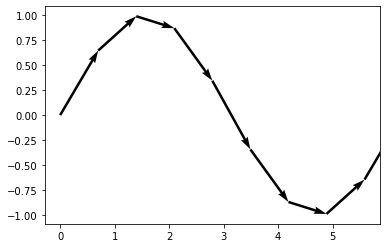

In [61]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

plt.figure()
plt.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], scale_units='xy', angles='xy', scale=1)

plt.show()

## Dwell Times

## Number of Distinct People

## Flow Analysis (Walking, Running, Dwelling)